In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
df = pd.read_csv('bank_marketing_train.csv')
df.head()

C:\Users\loganlv\AppData\Local\Temp\ipykernel_5616\1299749528.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,72,retired,married,basic.4y,no,no,no,telephone,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,no
1,30,admin.,single,university.degree,no,yes,no,cellular,aug,tue,1,999,0,nonexistent,-1.7,94.027,-38.3,0.886,4991.6,no
2,31,unemployed,married,university.degree,no,yes,no,cellular,aug,fri,4,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
3,37,admin.,married,high.school,no,yes,yes,cellular,nov,mon,1,999,0,nonexistent,-3.4,92.649,-30.1,0.722,5017.5,no
4,53,unemployed,divorced,basic.9y,unknown,no,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


In [13]:
X = df.copy()
y = X.pop('y')
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
y, _ = y.factorize()
discrete_features = X.dtypes == 'int64'
print(discrete_features)

age                True
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact            True
month              True
day_of_week        True
campaign           True
pdays              True
previous           True
poutcome           True
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
dtype: bool


In [8]:
from sklearn.feature_selection import mutual_info_regression

# discrete_features = []
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

cons.price.idx    0.073070
euribor3m         0.067874
cons.conf.idx     0.063352
nr.employed       0.057389
emp.var.rate      0.052293
pdays             0.032672
poutcome          0.030179
month             0.022056
previous          0.019209
contact           0.014709
age               0.012478
campaign          0.010341
job               0.005772
default           0.003259
education         0.002943
loan              0.000000
housing           0.000000
marital           0.000000
day_of_week       0.000000
Name: MI Scores, dtype: float64

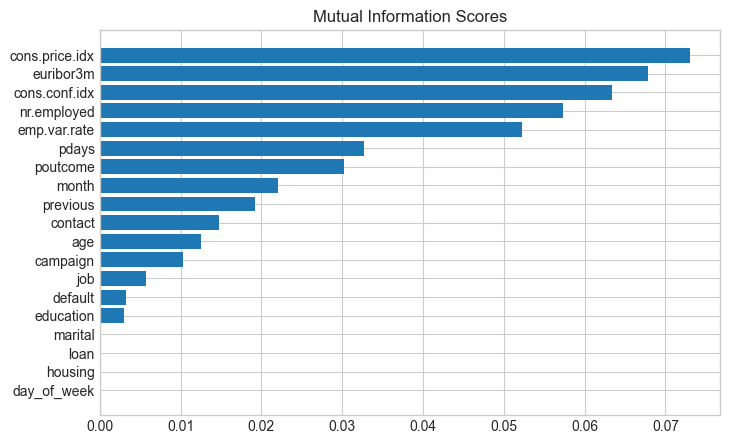

In [9]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [14]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
print(X.shape, y.shape)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(X_res.shape, y_res.shape)

(26246, 19) (26246,)
(46248, 19) (46248,)


(1000, 20) (1000,)
(1800, 20) (1800,)
